# GridHouseEnergy: Sensor Inteligente para rede Conectada com o Interscity

As células devem ser executadas em ordem, os testes são opcionais.

---

# Passo a Passo

## 1. Introdução

#### 1.1. Contextualização
Estes dados de sensores medem o consumo de energia de uma rede de sensores em ambientes industriais e residenciais, conectados a uma infraestrutura de monitoramento inteligente.

#### 1.2. Objetivos
- Detectar padrões e anomalias no consumo de energia.
- Agrupar os dados para observar comportamentos similares.
- Prever o consumo com algoritmos de séries temporais.

#### 1.3. Dados de Entrada e Saída

- **Entrada**: Dados mensais dos sensores de consumo em ambientes industriais e residenciais.
- **Saída**: Informações processadas para alertas, monitoramento em tempo real e histórico para análise preditiva.




## 2. Pré-processamento e Análise Inicial



#### 2.1. Importação de Bibliotecas

In [4]:
import pandas as pd
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import numpy as np

#### 2.2. Carregamento dos dados

In [5]:
# Carregar o arquivo Excel, pulando as primeiras linhas para começar diretamente nos dados
df = pd.read_excel('./data/household_data.xlsx', skiprows=4)

# Excluir a primeira linha, que parece ser um cabeçalho residual
df = df.drop(index=0).drop(columns=df.columns[1])

colunas_para_remover = ['feed', 'grid_import.3', 'grid_import.4']
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns])


In [6]:
# Remover colunas desnecessárias e colunas do tipo 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

data_inicial = '2014-12-11 17:45'  # Inclui data e hora
#2014-12-11T17:45:00Z
#2014-12-11 (quinta-feira) dezembro

df.index = pd.date_range(start=data_inicial, periods=len(df), freq='15T')
print(f"timestamp:{df.index.min()} ate {df.index.max()}" )


# Remover colunas desnecessárias (todas com NaN ou sem dados)
df = df.dropna(axis=1, how='all')

# Remover linhas que possuem somente valores NaN
df = df.dropna(axis=0, how='all')

C:\Users\DELL\AppData\Local\Temp\ipykernel_17340\4211298612.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.index = pd.date_range(start=data_inicial, periods=len(df), freq='15T')


timestamp:2014-12-11 17:45:00 ate 2019-05-01 22:00:00


o dado tem 153810 linhas e 66 colunas ainda com dados industriais, residenciais e publicos de 11 de dezembro de 2014 até 01 do 05 de 2019

#### 2.3. Renomeando as colunas


In [7]:
# Dicionário de mapeamento para os novos nomes de colunas
renomear_colunas = {
    # Industrial 1
    'grid_import': 'industrial1_grid_import',
    'pv_1': 'industrial1_pv_1',
    'pv_2': 'industrial1_pv_2',

    # Industrial 2
    'grid_import.1': 'industrial2_grid_import',
    'pv': 'industrial2_pv',
    'storage_charge': 'industrial2_storage_charge',
    'storage_decharge': 'industrial2_storage_decharge',

    # Industrial 3
    'area_offices': 'industrial3_area_offices',
    'area_room_1': 'industrial3_area_room_1',
    'area_room_2': 'industrial3_area_room_2',
    'area_room_3': 'industrial3_area_room_3',
    'area_room_4': 'industrial3_area_room_4',
    'compressor': 'industrial3_compressor',
    'cooling_aggregate': 'industrial3_cooling_aggregate',
    'cooling_pumps': 'industrial3_cooling_pumps',
    'dishwasher': 'industrial3_dishwasher',
    'ev': 'industrial3_ev',
    'grid_import.2': 'industrial3_grid_import',
    'machine_1': 'industrial3_machine_1',
    'machine_2': 'industrial3_machine_2',
    'machine_3': 'industrial3_machine_3',
    'machine_4': 'industrial3_machine_4',
    'machine_5': 'industrial3_machine_5',
    'pv_facade': 'industrial3_pv_facade',
    'pv_roof': 'industrial3_pv_roof',
    'refrigerator': 'industrial3_refrigerator',
    'ventilation': 'industrial3_ventilation',

    # Public 1 e 2
    'grid_import.3': 'public1_grid_import',
    'grid_import.4': 'public2_grid_import',

    # Residential 1
    'dishwasher.1': 'residential1_dishwasher',
    'freezer': 'residential1_freezer',
    'grid_import.5': 'residential1_grid_import',
    'heat_pump': 'residential1_heat_pump',
    'pv.1': 'residential1_pv',
    'washing_machine': 'residential1_washing_machine',

    # Residential 2
    'circulation_pump': 'residential2_circulation_pump',
    'dishwasher.2': 'residential2_dishwasher',
    
    'freezer.1': 'residential2_freezer',
    'grid_import.6': 'residential2_grid_import',
    'washing_machine.1': 'residential2_washing_machine',

    # Residential 3
    'circulation_pump.1': 'residential3_circulation_pump',
    'dishwasher.3': 'residential3_dishwasher',
    'freezer.2': 'residential3_freezer',
    'grid_export': 'residential3_grid_export',
    'grid_import.7': 'residential3_grid_import',
    'pv.2': 'residential3_pv',
    'refrigerator.1': 'residential3_refrigerator',
    'washing_machine.2': 'residential3_washing_machine',

    # Residential 4
    'dishwasher.4': 'residential4_dishwasher',
    'ev.1': 'residential4_ev',
    'freezer.3': 'residential4_freezer',
    'grid_export.1': 'residential4_grid_export',
    'grid_import.8': 'residential4_grid_import',
    'heat_pump.1': 'residential4_heat_pump',
    'pv.3': 'residential4_pv',
    'refrigerator.2': 'residential4_refrigerator',
    'washing_machine.3': 'residential4_washing_machine',

    # Residential 5
    'dishwasher.5': 'residential5_dishwasher',
    'grid_import.9': 'residential5_grid_import',
    'refrigerator.3': 'residential5_refrigerator',
    'washing_machine.4': 'residential5_washing_machine',

    # Residential 6
    'circulation_pump.2': 'residential6_circulation_pump',
    'dishwasher.6': 'residential6_dishwasher',
    'freezer.4': 'residential6_freezer',
    'grid_export.2': 'residential6_grid_export',
    'grid_import.10': 'residential6_grid_import',
    'pv.4': 'residential6_pv',
    'washing_machine.5': 'residential6_washing_machine'
}

# Renomear as colunas no DataFrame
df.rename(columns=renomear_colunas, inplace=True)


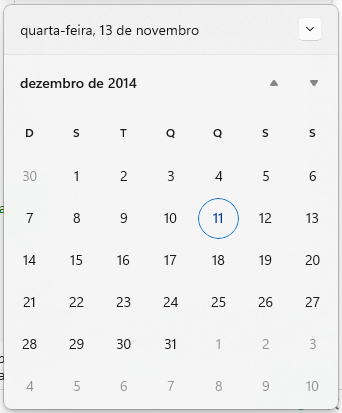

#### 2.4. Agrupando em industrias e residencias

In [8]:

""" df_energia = df.diff()

# Remover a primeira linha gerada pela diferenciação
df_energia.dropna(inplace=True) """

# Separar os dados industriais e residenciais
industrial_columns = [
    'industrial1_grid_import', 'industrial1_pv_1', 'industrial1_pv_2',
    'industrial2_grid_import', 'industrial2_pv', 'industrial2_storage_charge',
    'industrial2_storage_decharge', 'industrial3_area_offices', 'industrial3_area_room_1',
    'industrial3_area_room_2', 'industrial3_area_room_3', 'industrial3_area_room_4',
    'industrial3_compressor', 'industrial3_cooling_aggregate', 'industrial3_cooling_pumps',
    'industrial3_dishwasher', 'industrial3_ev', 'industrial3_grid_import', 'industrial3_machine_1',
    'industrial3_machine_2', 'industrial3_machine_3', 'industrial3_machine_4', 'industrial3_machine_5',
    'industrial3_pv_facade', 'industrial3_pv_roof', 'industrial3_refrigerator', 'industrial3_ventilation'
]
residential_columns = [
    'residential1_dishwasher', 'residential1_freezer', 'residential1_grid_import', 'residential1_heat_pump',
    'residential1_pv', 'residential1_washing_machine', 'residential2_circulation_pump',
    'residential2_dishwasher', 'residential2_freezer', 'residential2_grid_import',
    'residential2_washing_machine', 'residential3_circulation_pump', 'residential3_dishwasher',
    'residential3_freezer', 'residential3_grid_export', 'residential3_grid_import',
    'residential3_pv', 'residential3_refrigerator', 'residential3_washing_machine',
    'residential4_dishwasher', 'residential4_ev', 'residential4_freezer', 'residential4_grid_export',
    'residential4_grid_import', 'residential4_heat_pump', 'residential4_pv', 'residential4_refrigerator',
    'residential4_washing_machine', 'residential5_dishwasher', 'residential5_grid_import',
    'residential5_refrigerator', 'residential5_washing_machine', 'residential6_circulation_pump',
    'residential6_dishwasher', 'residential6_freezer', 'residential6_grid_export',
    'residential6_grid_import', 'residential6_pv', 'residential6_washing_machine'
]
residential_df = df[residential_columns]

industrial_df = df[industrial_columns]

# Salvar os dados
industrial_df.to_csv('./data/energia_acumulada_industrial_data.csv', index=True)
residential_df.to_csv('./data/energia_acumulada_residential_data.csv', index=True)
df.to_csv('./data/df_energia.csv', index=True)


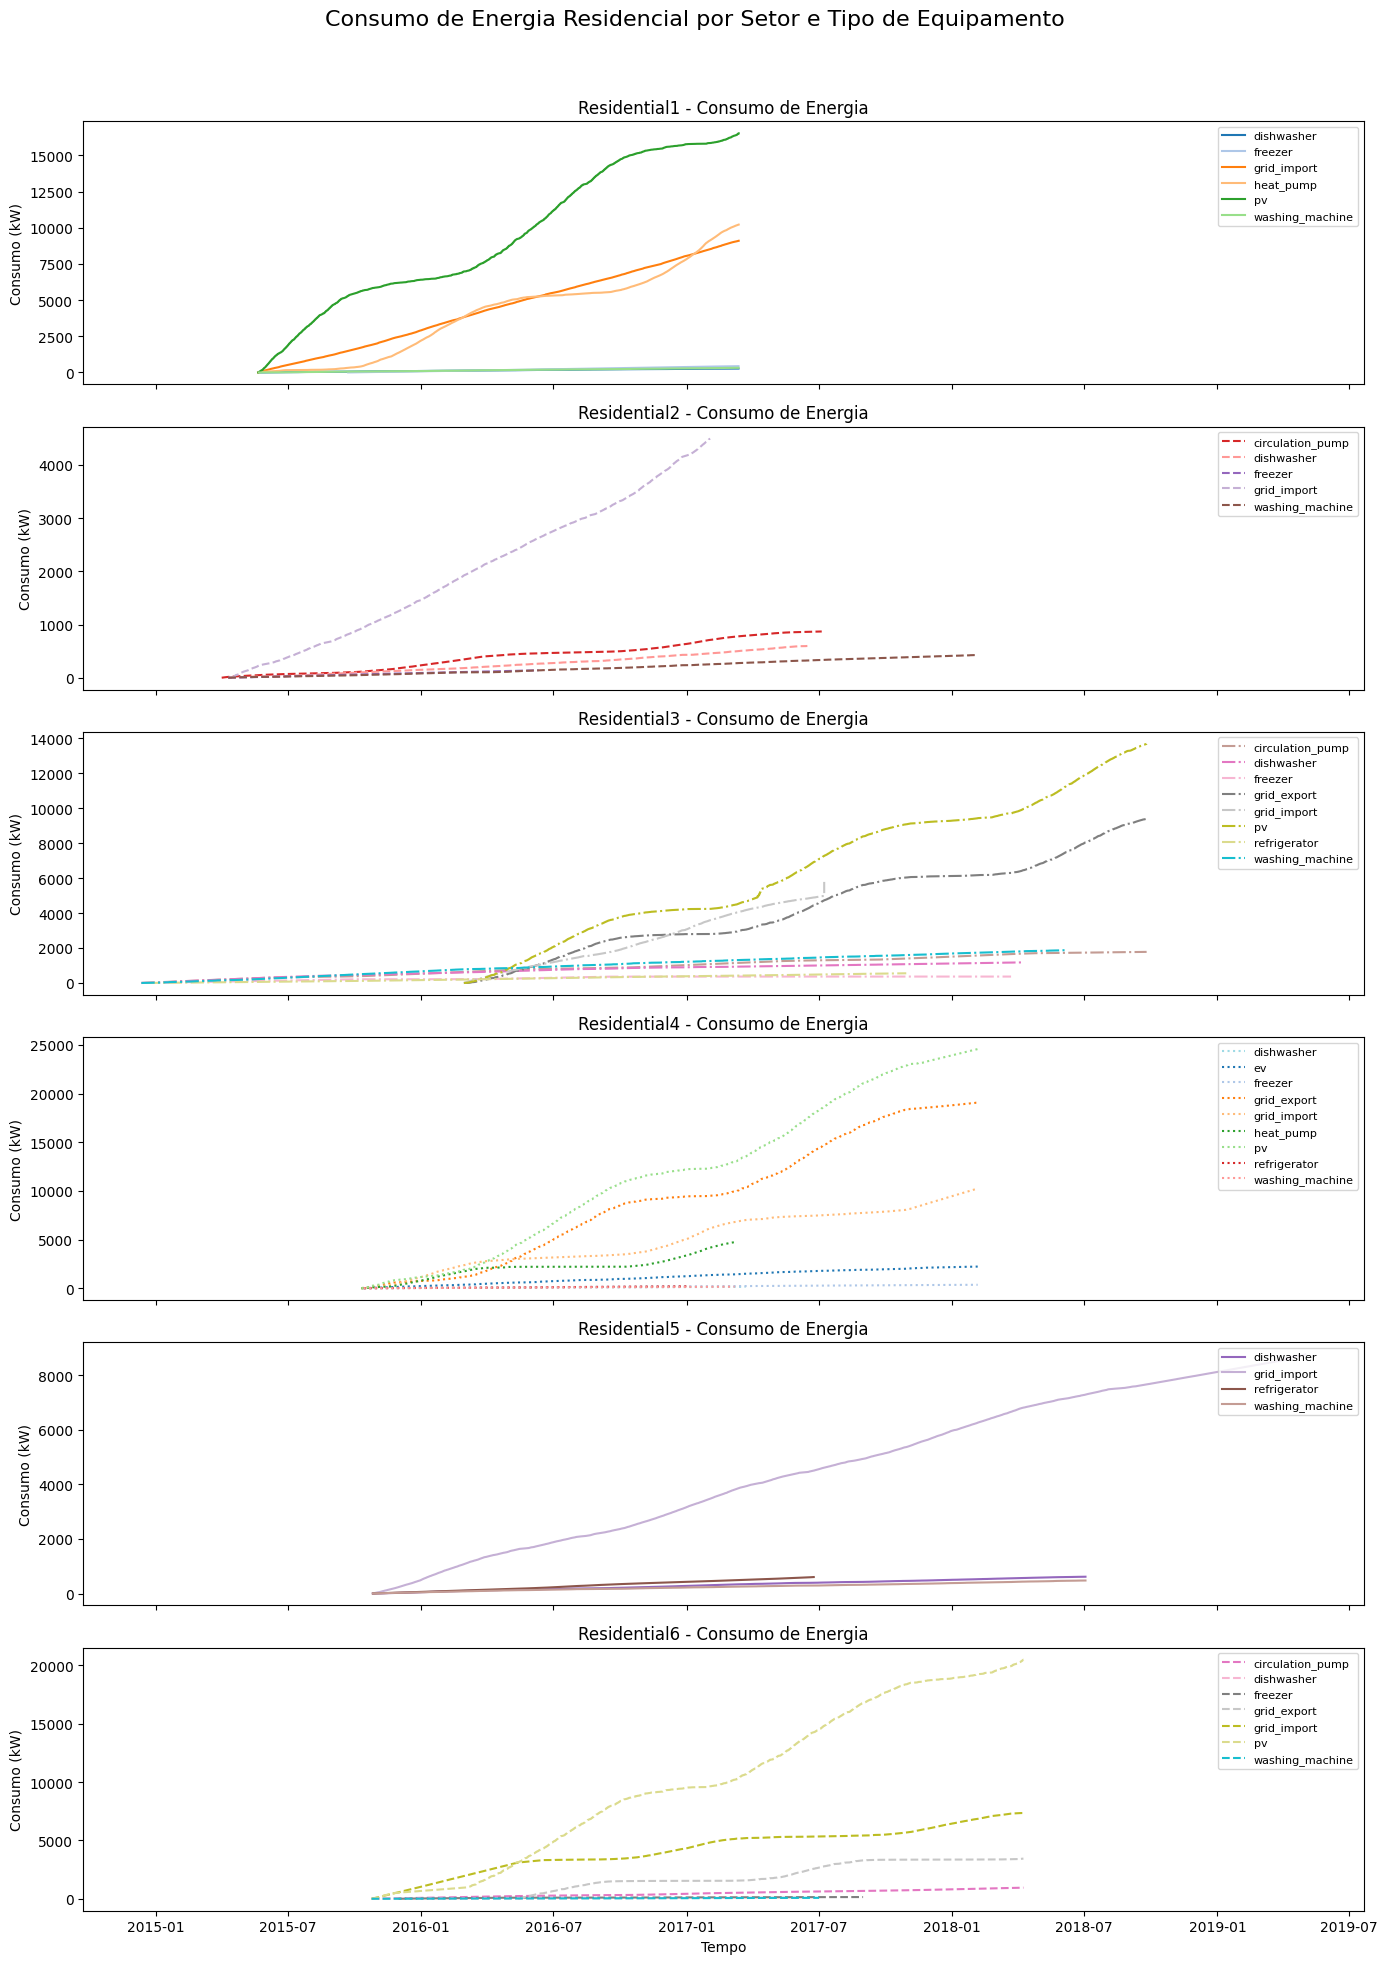

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 20), sharex=True)
fig.suptitle('Consumo de Energia Residencial por Setor e Tipo de Equipamento', fontsize=16)

# Lista de residências
residences = [
    'residential1', 'residential2', 'residential3',
    'residential4', 'residential5', 'residential6'
]

# Configurar cores e estilos para a plotagem
colors = sns.color_palette("tab20", len(residential_columns))
linestyles = ['-', '--', '-.', ':', '-', '--']

# Plotar os dados de cada residência em um subplot separado
for i, residence in enumerate(residences):
    # Filtrar colunas da residência atual
    columns = [col for col in residential_columns if residence in col]

    # Plotar cada coluna da residência atual
    for col in columns:
        axes[i].plot(residential_df.index, residential_df[col], label=col.split('_', 1)[1],
                     color=colors[residential_columns.index(col)], linestyle=linestyles[i % len(linestyles)])

    # Configurações do eixo atual
    axes[i].set_title(f'{residence.capitalize()} - Consumo de Energia')
    axes[i].set_ylabel('Consumo (kW)')
    axes[i].legend(loc='upper right', fontsize=8)

# Configurações finais
plt.xlabel('Tempo')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Dessa forma observamos que os dados de consumo eles são de dados de energia que vão se acmulando ao longo do tempo, que é caracteriscos de dados de medidores de energia

#### 2.5. Analise das Residencias

então vamos analisar primeiramente os dados residencias

Diferenciando os dados de energia, teremos a potencia que seria a derivada da energia acumulada no tempo

In [10]:
df_energia = df.diff()

residential_columns = [
    'residential1_dishwasher', 'residential1_freezer', 'residential1_grid_import', 'residential1_heat_pump',
    'residential1_pv', 'residential1_washing_machine', 'residential2_circulation_pump',
    'residential2_dishwasher', 'residential2_freezer', 'residential2_grid_import',
    'residential2_washing_machine', 'residential3_circulation_pump', 'residential3_dishwasher',
    'residential3_freezer', 'residential3_grid_export', 'residential3_grid_import',
    'residential3_pv', 'residential3_refrigerator', 'residential3_washing_machine',
    'residential4_dishwasher', 'residential4_ev', 'residential4_freezer', 'residential4_grid_export',
    'residential4_grid_import', 'residential4_heat_pump', 'residential4_pv', 'residential4_refrigerator',
    'residential4_washing_machine', 'residential5_dishwasher', 'residential5_grid_import',
    'residential5_refrigerator', 'residential5_washing_machine', 'residential6_circulation_pump',
    'residential6_dishwasher', 'residential6_freezer', 'residential6_grid_export',
    'residential6_grid_import', 'residential6_pv', 'residential6_washing_machine'
]
residential_df = df_energia[residential_columns]

residential_df = residential_df[(residential_df >= 0) & (residential_df <= 3)]

residential_df.to_csv('./data/potencia_residential_data.csv', index=True)



In [11]:
import pandas as pd

residential_df = pd.read_csv('./data/potencia_residential_data.csv', index_col=0)

residential_data1=residential_df.filter(like='residential1_')
residential_data2=residential_df.filter(like='residential2_')
residential_data3=residential_df.filter(like='residential3_')
residential_data4=residential_df.filter(like='residential4_')
residential_data5=residential_df.filter(like='residential5_')
residential_data6=residential_df.filter(like='residential6_')

In [3]:
print(residential_df.columns)


Index(['residential1_dishwasher', 'residential1_freezer',
       'residential1_grid_import', 'residential1_heat_pump', 'residential1_pv',
       'residential1_washing_machine', 'residential2_circulation_pump',
       'residential2_dishwasher', 'residential2_freezer',
       'residential2_grid_import', 'residential2_washing_machine',
       'residential3_circulation_pump', 'residential3_dishwasher',
       'residential3_freezer', 'residential3_grid_export',
       'residential3_grid_import', 'residential3_pv',
       'residential3_refrigerator', 'residential3_washing_machine',
       'residential4_dishwasher', 'residential4_ev', 'residential4_freezer',
       'residential4_grid_export', 'residential4_grid_import',
       'residential4_heat_pump', 'residential4_pv',
       'residential4_refrigerator', 'residential4_washing_machine',
       'residential5_dishwasher', 'residential5_grid_import',
       'residential5_refrigerator', 'residential5_washing_machine',
       'residential6_circul

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 20), sharex=True)
fig.suptitle('Consumo de Energia Residencial por Setor e Tipo de Equipamento', fontsize=16)

# Lista de residências
residences = [
    'residential1', 'residential2', 'residential3',
    'residential4', 'residential5', 'residential6'
]

# Configurar cores e estilos para a plotagem
colors = sns.color_palette("tab20", len(residential_columns))
linestyles = ['-', '--', '-.', ':', '-', '--']

# Plotar os dados de cada residência em um subplot separado
for i, residence in enumerate(residences):
    # Filtrar colunas da residência atual
    columns = [col for col in residential_columns if residence in col]

    # Plotar cada coluna da residência atual
    for col in columns:
        axes[i].plot(residential_df.index, residential_df[col], label=col.split('_', 1)[1],
                     color=colors[residential_columns.index(col)], linestyle=linestyles[i % len(linestyles)])

    # Configurações do eixo atual
    axes[i].set_title(f'{residence.capitalize()} - Consumo de Energia')
    axes[i].set_ylabel('Consumo (kW)')
    axes[i].legend(loc='upper right', fontsize=8)

# Configurações finais
plt.xlabel('Tempo')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

KeyboardInterrupt: 

Análise completa das cargas, geração, e dados de importação/exportação para todas as residências com base nas colunas fornecidas:

### 1. **Identificação das Cargas**  
As cargas consideradas são:  
- `circulation_pump`, `dishwasher`, `freezer`, `refrigerator`, `washing_machine`, `heat_pump`, `ev`.

**Distribuição por residência**:
| Residência       | Cargas Identificadas                                                                 |
|-------------------|--------------------------------------------------------------------------------------|
| `residential1`   | `dishwasher`, `freezer`, `heat_pump`, `washing_machine`                              |
| `residential2`   | `circulation_pump`, `dishwasher`, `freezer`, `washing_machine`                       |
| `residential3`   | `circulation_pump`, `dishwasher`, `freezer`, `refrigerator`, `washing_machine`       |
| `residential4`   | `dishwasher`, `freezer`, `heat_pump`, `refrigerator`, `washing_machine`, `ev`        |
| `residential5`   | `dishwasher`, `refrigerator`, `washing_machine`                                      |
| `residential6`   | `circulation_pump`, `dishwasher`, `freezer`, `washing_machine`                       |

### 2. **Geração (PV)**  
A coluna `pv` representa geração de energia fotovoltaica.  

**Quem possui geração**:
- `residential1`: Sim
- `residential2`: Não
- `residential3`: Sim
- `residential4`: Sim
- `residential5`: Não
- `residential6`: Sim

### 3. **Importação de Energia**  
A coluna `grid_import` indica importação de energia da rede elétrica.  

**Quem importa energia**:
- `residential1`: Sim
- `residential2`: Sim
- `residential3`: Sim
- `residential4`: Sim
- `residential5`: Sim
- `residential6`: Sim

### 4. **Exportação de Energia**  
A coluna `grid_export` indica exportação de energia para a rede elétrica.  

**Quem exporta energia**:
- `residential1`: Não
- `residential2`: Não
- `residential3`: Sim
- `residential4`: Sim
- `residential5`: Não
- `residential6`: Sim

---

### Resumo Consolidado:

| Residência       | Cargas                     | Geração PV | Importa Energia | Exporta Energia |
|-------------------|----------------------------|------------|-----------------|-----------------|
| `residential1`   | 4                          | Sim        | Sim             | Não             |
| `residential2`   | 4                          | Não        | Sim             | Não             |
| `residential3`   | 5                          | Sim        | Sim             | Sim             |
| `residential4`   | 6                          | Sim        | Sim             | Sim             |
| `residential5`   | 3                          | Não        | Sim             | Não             |
| `residential6`   | 4                          | Sim        | Sim             | Sim             |

### Observações:
1. Todas as residências possuem ao menos 3 cargas e importam energia.
2. Residências com geração PV (`residential1`, `residential3`, `residential4`, `residential6`) tendem a exportar energia, exceto `residential1`.
3. A residência `residential4` é a mais diversificada, com maior quantidade de cargas e exportação de energia.



### Fórmulas Descritivas da Classe `EnergyModel`

1. **Energia Importada da Rede**  
$$
\text{Importação} = \max(\text{cargas} - \text{pv}, 0)
$$

2. **Energia Exportada para a Rede**  
$$
\text{Exportação} = \max(\text{pv} - \text{cargas}, 0)
$$

3. **Balanço Energético Geral**  
$$
\text{Cargas Supridas} = \text{pv} + \text{Importação} - \text{Exportação}
$$

---

### Onde:
- **`cargas`**: Energia consumida pelas cargas (kW).
- **`pv`**: Energia gerada pelo sistema fotovoltaico (kW).
- **`Importação`**: Energia necessária importada da rede (kW).
- **`Exportação`**: Excedente de energia exportado para a rede (kW).
- **`Cargas Supridas`**: Energia total disponível para as cargas (kW).

---

### Colunas Relevantes para Residência 3

- `residential3_circulation_pump`
- `residential3_dishwasher`
- `residential3_freezer`
- `residential3_grid_import`
- `residential3_grid_export`
- `residential3_pv`
- `residential3_refrigerator`
- `residential3_washing_machine`


## Visão Geral

Este projeto apresenta uma abordagem para modelar padrões de consumo energético, integrando a modelagem de cargas, geração fotovoltaica (PV) e fluxos de energia (importação/exportação da rede). Além disso, utiliza redes neurais para classificar padrões de consumo de usuários ou residências.

---

## Implementação Base

A implementação inicial modela os fluxos de energia com a classe `EnergyModel`, que calcula os valores de:

- **Importação de Energia**: Energia necessária da rede para suprir as cargas.
- **Exportação de Energia**: Excedente de energia gerada pelo sistema fotovoltaico exportado para a rede.
- **Balanço Energético**: Resumo geral do consumo e geração.

### Código: Modelo Energético

```python
class EnergyModel:
    def __init__(self, cargas, pv):
        """
        Inicializa os valores de carga e geração fotovoltaica.

        :param cargas: Energia consumida pelas cargas (kW)
        :param pv: Energia gerada pelo sistema fotovoltaico (kW)
        """
        self.cargas = cargas
        self.pv = pv

    def calcular_importacao(self):
        """
        Calcula a energia importada da rede.
        :return: Valor da importação de energia (kW)
        """
        return max(self.cargas - self.pv, 0)

    def calcular_exportacao(self):
        """
        Calcula a energia exportada para a rede.
        :return: Valor da exportação de energia (kW)
        """
        return max(self.pv - self.cargas, 0)

    def balanco_energetico(self):
        """
        Calcula o balanço energético geral.
        :return: Dicionário com os valores de importação, exportação e total.
        """
        importacao = self.calcular_importacao()
        exportacao = self.calcular_exportacao()
        total = self.pv + importacao - exportacao

        return {
            "Importação": importacao,
            "Exportação": exportacao,
            "Cargas Supridas": total
        }
```

---

## Classificação com Redes Neural LSTM

Para identificar padrões de consumo, utilizamos redes neurais que classificam residências com base nos fluxos de energia.

### Passos:

1. **Coleta de Dados**:
   - Consumo de cargas (`cargas`).
   - Geração fotovoltaica (`pv`).
   - Importação e exportação de energia.

2. **Pré-processamento**:
   - Normalização de valores numéricos.
   - Codificação de variáveis categóricas (ex.: one-hot encoding).
   - Divisão em conjuntos de treinamento, validação e teste.

3. **Definição de Classes**:
   - Classe 0: Baixo consumo, alta exportação.
   - Classe 1: Médio consumo, equilíbrio entre importação/exportação.
   - Classe 2: Alto consumo, alta importação.

In [138]:
class EnergyModel:
    def __init__(self, cargas, pv):
        """
        Inicializa os valores de carga e geração fotovoltaica.

        :param cargas: Energia consumida pelas cargas (kW)
        :param pv: Energia gerada pelo sistema fotovoltaico (kW)
        """
        self.cargas = cargas
        self.pv = pv

    def calcular_importacao(self):
        """
        Calcula a energia importada da rede.
        :return: Valor da importação de energia (kW)
        """
        return max(self.cargas - self.pv, 0)

    def calcular_exportacao(self):
        """
        Calcula a energia exportada para a rede.
        :return: Valor da exportação de energia (kW)
        """
        return max(self.pv - self.cargas, 0)

    def balanco_energetico(self):
        """
        Calcula o balanço energético geral.
        :return: Dicionário com os valores de importação, exportação e total.
        """
        importacao = self.calcular_importacao()
        exportacao = self.calcular_exportacao()
        total = self.pv + importacao - exportacao

        return {
            "Importação": importacao,
            "Exportação": exportacao,
            "Cargas Supridas": total
        }



In [139]:
# Aplicar EnergyModel para cada linha do DataFrame
resultados = []

for index, row in residential_data3.iterrows():
    cargas = row[
        [
            'residential3_circulation_pump',
            'residential3_dishwasher',
            'residential3_freezer',
            'residential3_refrigerator',
            'residential3_washing_machine'
        ]
    ].sum()
    pv = row['residential3_pv']
    
    # Criar o modelo
    modelo = EnergyModel(cargas=cargas, pv=pv)
    
    # Obter o balanço energético
    resultado = modelo.balanco_energetico()
    resultados.append(resultado)

# Adicionar resultados ao DataFrame

residential_data3['Importação'] = [r['Importação'] for r in resultados]
residential_data3['Exportação'] = [r['Exportação'] for r in resultados]
residential_data3['Cargas Supridas'] = [r['Cargas Supridas'] for r in resultados]

C:\Users\DELL\AppData\Local\Temp\ipykernel_31036\1718867321.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_data3['Importação'] = [r['Importação'] for r in resultados]
C:\Users\DELL\AppData\Local\Temp\ipykernel_31036\1718867321.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_data3['Exportação'] = [r['Exportação'] for r in resultados]
C:\Users\DELL\AppData\Local\Temp\ipykernel_31036\1718867321.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [72]:
class EnergyModel:
    def __init__(self, pv, importacao=None, exportacao=None):
        """
        Inicializa os valores de geração fotovoltaica, importação e exportação.

        :param pv: Energia gerada pelo sistema fotovoltaico (kW)
        :param importacao: Energia importada da rede (kW), opcional
        :param exportacao: Energia exportada para a rede (kW), opcional
        """
        self.pv = pv
        self.importacao = importacao
        self.exportacao = exportacao

    def calcular_cargas(self):
        """
        Calcula a energia consumida pelas cargas a partir de PV, importação e exportação.
        :return: Valor das cargas (kW)
        """
        if self.importacao is not None and self.exportacao is not None:
            return self.pv + self.importacao - self.exportacao
        raise ValueError("Importação e Exportação devem ser fornecidas para calcular as cargas.")

    def balanco_energetico(self):
        """
        Calcula o balanço energético geral.
        :return: Dicionário com os valores de PV, importação, exportação e cargas.
        """
        cargas = self.calcular_cargas()
        return {
            "PV": self.pv,
            "Importação": self.importacao,
            "Exportação": self.exportacao,
            "Cargas": cargas
        }


# Aplicar EnergyModel inverso para cada linha do DataFrame
resultados = []

for index, row in residential_data3.iterrows():
    pv = row['residential3_pv']
    importacao = row['residential3_grid_import']
    exportacao = row['residential3_grid_export']
    
    # Criar o modelo
    modelo = EnergyModel(pv=pv, importacao=importacao, exportacao=exportacao)
    
    # Obter o balanço energético
    resultado = modelo.balanco_energetico()
    resultados.append(resultado)

# Adicionar resultados ao DataFrame
residential_data3['Cargas Calculadas'] = [r['Cargas'] for r in resultados]


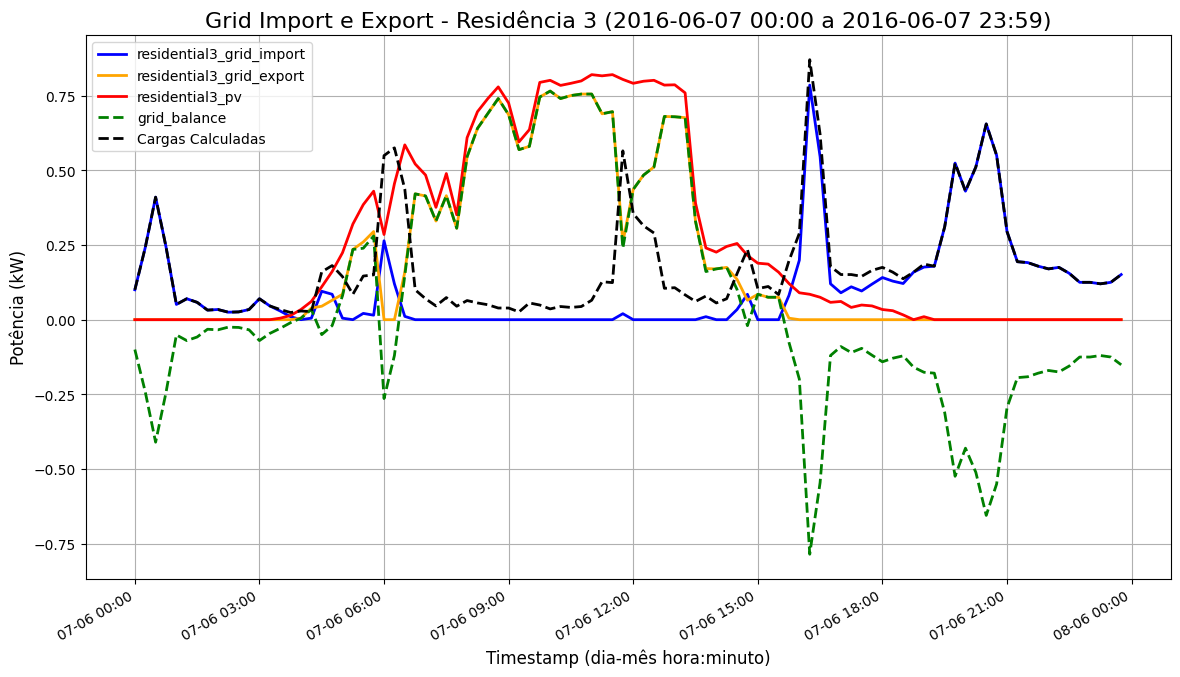

In [ ]:
class EnergyModel:
    def __init__(self, pv, importacao=None, exportacao=None):
        """
        Inicializa os valores de geração fotovoltaica, importação e exportação.

        :param pv: Energia gerada pelo sistema fotovoltaico (kW)
        :param importacao: Energia importada da rede (kW), opcional
        :param exportacao: Energia exportada para a rede (kW), opcional
        """
        self.pv = pv
        self.importacao = importacao
        self.exportacao = exportacao

    def calcular_cargas(self):
        """
        Calcula a energia consumida pelas cargas a partir de PV, importação e exportação.
        :return: Valor das cargas (kW)
        """
        if self.importacao is not None and self.exportacao is not None:
            return self.pv + self.importacao - self.exportacao
        raise ValueError("Importação e Exportação devem ser fornecidas para calcular as cargas.")

    def balanco_energetico(self):
        """
        Calcula o balanço energético geral.
        :return: Dicionário com os valores de PV, importação, exportação e cargas.
        """
        cargas = self.calcular_cargas()
        return {
            "PV": self.pv,
            "Importação": self.importacao,
            "Exportação": self.exportacao,
            "Cargas": cargas
        }


# Aplicar EnergyModel inverso para cada linha do DataFrame
resultados = []

for index, row in residential_data3.iterrows():
    pv = row['residential3_pv']
    importacao = row['residential3_grid_import']
    exportacao = row['residential3_grid_export']
    
    # Criar o modelo
    modelo = EnergyModel(pv=pv, importacao=importacao, exportacao=exportacao)
    
    # Obter o balanço energético
    resultado = modelo.balanco_energetico()
    resultados.append(resultado)

# Adicionar resultados ao DataFrame
residential_data3['Cargas Calculadas'] = [r['Cargas'] for r in resultados]


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Definir intervalo de interesse
data_inicial_intervalo = '2016-06-07 00:00'
data_final_intervalo = '2016-06-07 23:59'

residential_data3['grid_balance'] = residential_data3['residential3_grid_export'] - residential_data3['residential3_grid_import']
# Selecionar intervalo de tempo
dados_intervalo = residential_data3.loc[data_inicial_intervalo:data_final_intervalo]


# Visualizar dados
plt.figure(figsize=(14, 8))

# Plotar grid import e grid export
#plt.plot(dados_intervalo.index, dados_intervalo['Cargas Supridas'], label=dados_intervalo['Cargas Supridas'].name, color='black', linewidth=2, linestyle='--')
plt.plot(dados_intervalo.index, dados_intervalo['residential3_grid_import'], label=dados_intervalo['residential3_grid_import'].name, color='blue', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['residential3_grid_export'], label=dados_intervalo['residential3_grid_export'].name, color='orange', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['residential3_pv'], label=dados_intervalo['residential3_pv'].name, color='red', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['grid_balance'], label=residential_data3['grid_balance'].name, color='green', linestyle='--', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['Cargas Calculadas'], label=residential_data3['Cargas Calculadas'].name, color='black', linestyle='--', linewidth=2)

# Configurar título, eixos e legenda
plt.title(f'Grid Import e Export - Residência 3 ({data_inicial_intervalo} a {data_final_intervalo})', fontsize=16)
plt.xlabel('Timestamp (dia-mês hora:minuto)', fontsize=12)
plt.ylabel('Potência (kW)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Formatação do eixo x
formatter = mdates.DateFormatter('%d-%m %H:%M')
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()

# Mostrar gráfico
plt.show()


Data inicial: 2014-12-11 17:45:00
Data final: 2019-05-01 22:00:00


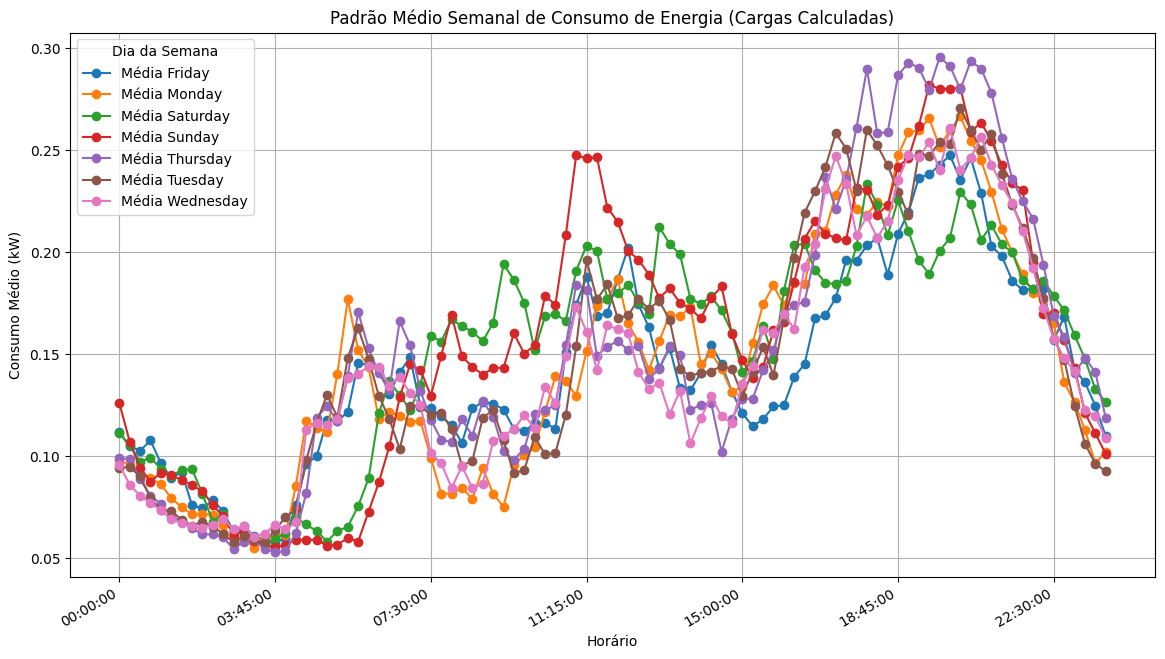

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = residential_data3.index

# Obter a data inicial e final automaticamente
data_inicial = data.min()  # Primeira data do índice
end_date = data.max()    # Última data do índice

# Exibir as datas
print(f"Data inicial: {data_inicial}")
print(f"Data final: {end_date}")
# Definir parâmetros iniciais

frequencia = '15T'  # Frequência de 15 minutos

coluna_para_plotar = 'Cargas Calculadas'
if coluna_para_plotar in residential_data3.columns:
    # Filtrar o DataFrame a partir da data inicial especificada
    residential_data3 = residential_data3[residential_data3.index >= data_inicial]

    # Criar colunas de dia da semana e horário usando .loc
    residential_data3.loc[:, 'day_of_week'] = residential_data3.index.day_name()
    residential_data3.loc[:, 'time'] = residential_data3.index.time

    # Agrupar por dia da semana e hora e calcular a média
    weekly_pattern = residential_data3.groupby(['day_of_week', 'time'])[coluna_para_plotar].mean().unstack(level=0)

    # Converter o índice para string para evitar problemas de tipo com datetime.time no Matplotlib
    weekly_pattern.index = weekly_pattern.index.astype(str)

    # Plotar a média semanal para cada dia e horário
    plt.figure(figsize=(14, 8))
    for day in weekly_pattern.columns:
        plt.plot(weekly_pattern.index, weekly_pattern[day], label=f'Média {day}')


    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  
    plt.gcf().autofmt_xdate()  
    # Configurações de plotagem
    plt.xlabel('Horário')
    plt.ylabel('Consumo Médio (kW)')
    plt.title(f'Padrão Médio Semanal de Consumo de Energia ({coluna_para_plotar})')
    plt.legend(title='Dia da Semana')
    plt.grid(True)
    plt.show()

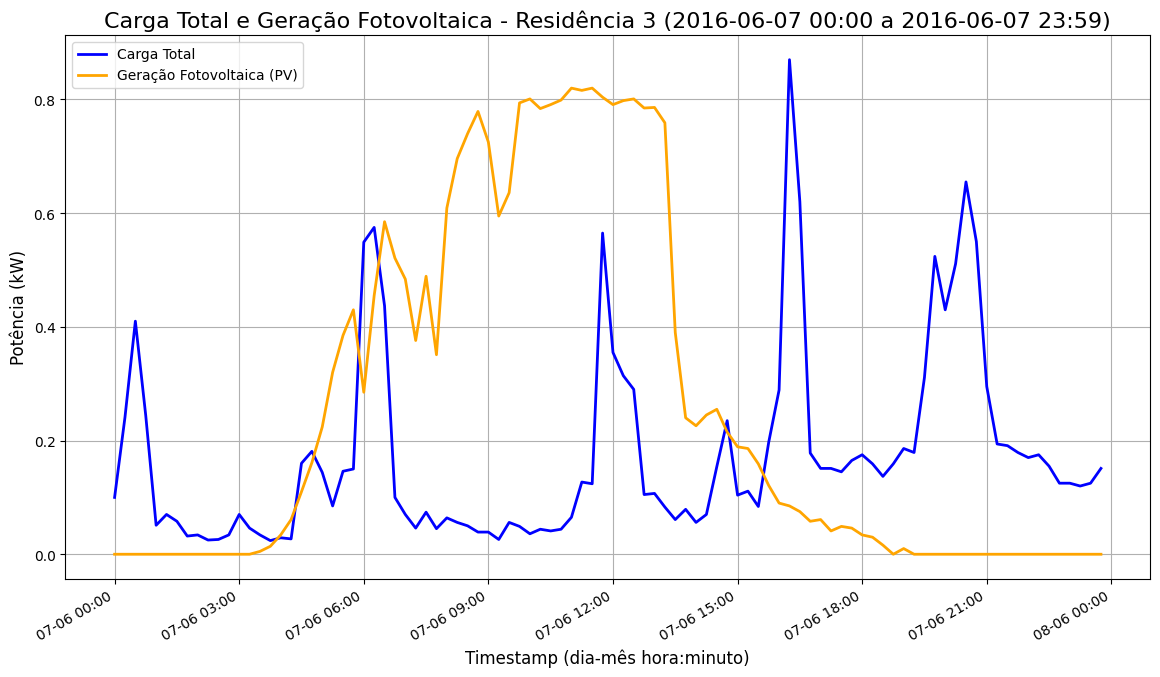

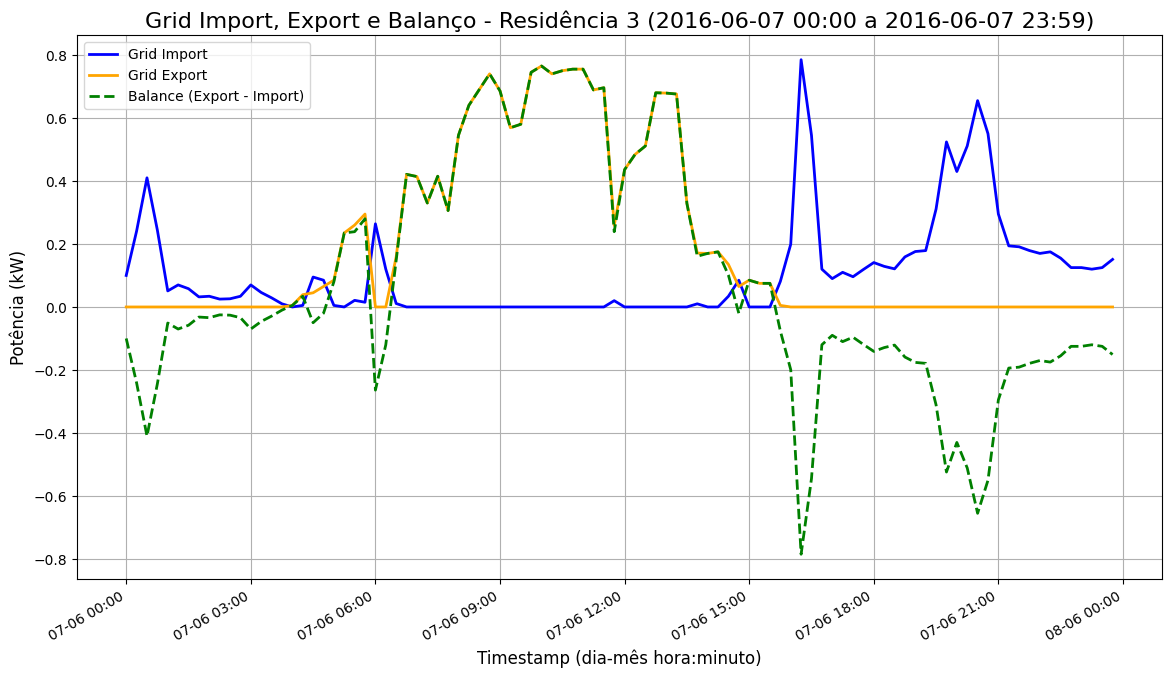

In [79]:
plt.figure(figsize=(14, 8))

plt.plot(dados_intervalo.index, dados_intervalo['Cargas Calculadas'], label='Carga Total', color='blue', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['residential3_pv'], label='Geração Fotovoltaica (PV)', color='orange', linewidth=2)

plt.title(f'Carga Total e Geração Fotovoltaica - Residência 3 ({data_inicial_intervalo} a {data_final_intervalo})', fontsize=16)
plt.xlabel('Timestamp (dia-mês hora:minuto)', fontsize=12)
plt.ylabel('Potência (kW)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

formatter = mdates.DateFormatter('%d-%m %H:%M')
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()

plt.show()


plt.figure(figsize=(14, 8))

plt.plot(dados_intervalo.index, dados_intervalo['residential3_grid_import'], label='Grid Import', color='blue', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['residential3_grid_export'], label='Grid Export', color='orange', linewidth=2)
plt.plot(dados_intervalo.index, dados_intervalo['grid_balance'], label='Balance (Export - Import)', color='green', linestyle='--', linewidth=2)

plt.title(f'Grid Import, Export e Balanço - Residência 3 ({data_inicial_intervalo} a {data_final_intervalo})', fontsize=16)
plt.xlabel('Timestamp (dia-mês hora:minuto)', fontsize=12)
plt.ylabel('Potência (kW)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

formatter = mdates.DateFormatter('%d-%m %H:%M')
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()

plt.show()



## Interpretação dos Resultados

### Discrepância de Importação (`Diff_Importação`):
- **Contagem (count)**: 47.611 observações, indicando que existem 47.611 valores registrados para a diferença de importação.
- **Média (mean)**: A média das discrepâncias de importação é aproximadamente **0.097 kW**, o que sugere que, em média, os valores de importação calculados e os reais têm uma diferença pequena.
- **Desvio padrão (std)**: O desvio padrão é **3.685 kW**, indicando que as discrepâncias podem variar bastante, com alguns valores de discrepância muito maiores do que a média.
- **Mínimo (min)**: A menor discrepância é **0.000 kW**, ou seja, em alguns casos não há diferença entre os valores calculados e os reais.
- **25% (1º quartil)**: 25% das discrepâncias de importação são menores ou iguais a **0.000 kW**, o que sugere que em uma parte significativa dos dados, a discrepância é praticamente zero.
- **50% (mediana)**: 50% das discrepâncias estão abaixo de **0.038 kW**, o que indica que a mediana das discrepâncias é pequena.
- **75% (3º quartil)**: 75% das discrepâncias de importação são menores ou iguais a **0.123 kW**, o que ainda é relativamente baixo, mas indica que uma parte dos dados tem discrepâncias um pouco maiores.
- **Máximo (max)**: A maior discrepância é **803.923 kW**, o que é um valor extremamente alto e sugere a presença de alguns outliers ou erros em dados específicos.

### Discrepância de Exportação (`Diff_Exportação`):
- **Contagem (count)**: 90.217 observações, indicando que existem 90.217 valores registrados para a diferença de exportação.
- **Média (mean)**: A média das discrepâncias de exportação é **0.035 kW**, indicando que, em média, as discrepâncias de exportação são ainda menores do que as de importação.
- **Desvio padrão (std)**: O desvio padrão é **0.556 kW**, sugerindo que a variação das discrepâncias de exportação é muito menor em comparação com as de importação.
- **Mínimo (min)**: A menor discrepância é **0.000 kW**, similar às discrepâncias de importação.
- **25% (1º quartil)**: 25% das discrepâncias de exportação são menores ou iguais a **0.000 kW**, indicando que uma grande parte dos valores tem discrepâncias nulas.
- **50% (mediana)**: 50% das discrepâncias de exportação são menores ou iguais a **0.000 kW**, sugerindo que a mediana das discrepâncias é zero em muitos casos.
- **75% (3º quartil)**: 75% das discrepâncias de exportação são menores ou iguais a **0.040 kW**, sugerindo que as discrepâncias tendem a ser pequenas.
- **Máximo (max)**: A maior discrepância é **73.289 kW**, o que é consideravelmente menor do que a discrepância máxima de importação, mas ainda assim um valor alto, indicando que alguns valores discrepantes existem.

### Considerações:
- A discrepância média entre os valores calculados e reais de importação e exportação parece ser pequena, o que é bom, mas existem outliers significativos, especialmente no caso da importação, onde a discrepância pode ser muito alta (até **803 kW**).
- As discrepâncias para a exportação têm uma variação bem menor, o que pode indicar que os cálculos de exportação estão mais precisos ou que os dados reais para exportação são mais consistentes.


## 3. Aprendizado de maquina


#### LSTM Autoencoder

O trabalho do [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder) é receber um conjunto de dados de entrada, passá-lo pelo modelo e obter uma reconstrução da entrada. A reconstrução deve se assemelhar o máximo possível à entrada original. O truque é usar um número reduzido de parâmetros, para que o modelo aprenda uma representação comprimida dos dados.

De certa forma, os Autoencoders tentam aprender apenas os aspectos mais importantes (uma versão compactada) dos dados. Aqui, veremos como alimentar dados de séries temporais em um Autoencoder. Usaremos algumas camadas LSTM (daí o nome LSTM Autoencoder) para capturar as dependências temporais dos dados.

Para classificar uma sequência como normal ou uma anomalia, escolheremos um limite acima do qual um evento será considerado anormal.

### Perda de Reconstrução

Ao treinar um Autoencoder, o objetivo é reconstruir a entrada da melhor forma possível. Isso é feito minimizando uma função de perda (assim como no aprendizado supervisionado). Essa função é conhecida como *perda de reconstrução*. Exemplos comuns incluem a perda de entropia cruzada e o erro quadrático médio (Mean Squared Error).

Passo 1: Importar bibliotecas

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


Passo 2: Preparar os dados

2.1. Normalizar os dados
Normalizamos os dados para lidar com diferentes escalas de características.

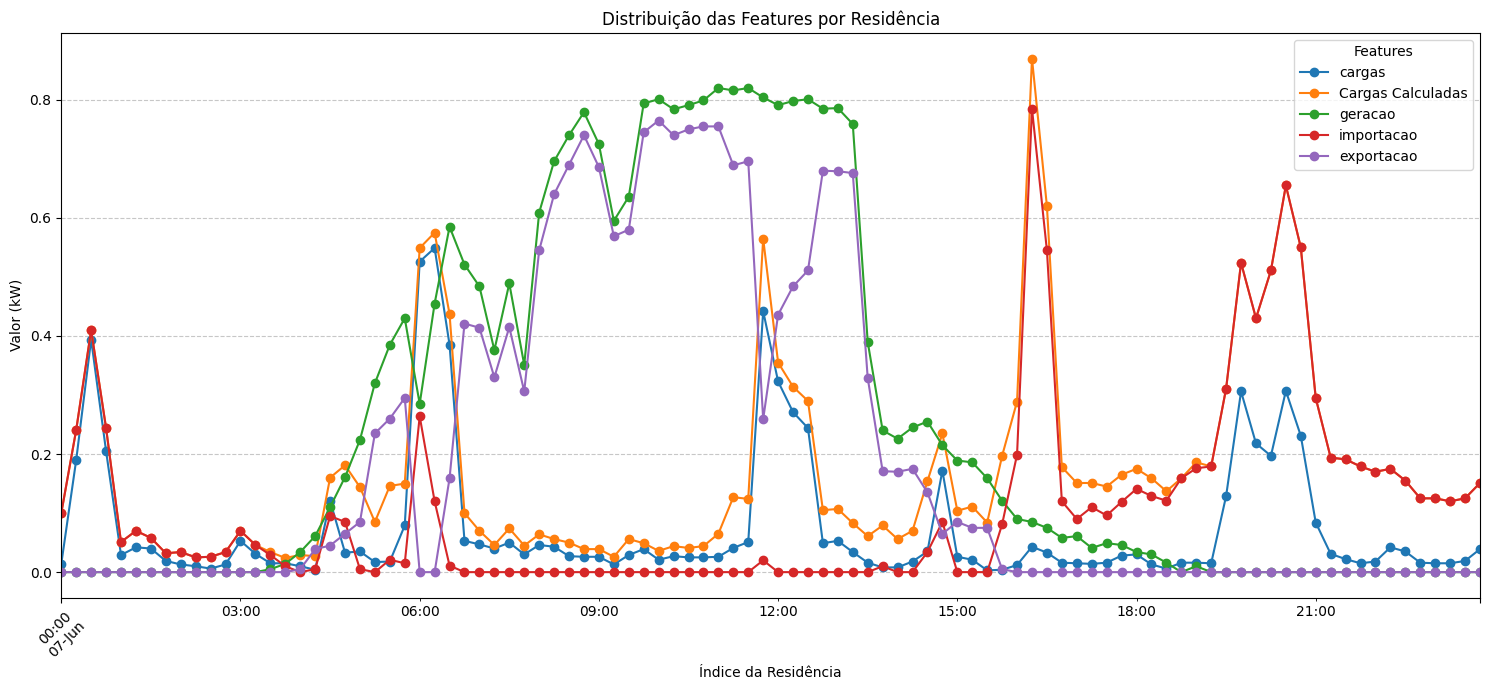

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset


# Pré-processamento dos dados
cargas = dados_intervalo[[col for col in dados_intervalo.columns if any(key in col for key in ["circulation_pump", "dishwasher", "freezer", "refrigerator", "washing_machine", "heat_pump", "ev"])]].sum(axis=1)
geracao = dados_intervalo[[col for col in dados_intervalo.columns if "pv" in col]].sum(axis=1)
importacao = dados_intervalo["residential3_grid_import"]
exportacao = dados_intervalo["residential3_grid_export"]

# Consolidar os dados
features = pd.DataFrame({
    "cargas": cargas,
    "Cargas Calculadas": dados_intervalo['Cargas Calculadas'],
    "geracao": geracao,
    "importacao": importacao,
    "exportacao": exportacao,
    
})

# Plot das features
import matplotlib.pyplot as plt

features.plot(kind="line", figsize=(15, 7), marker='o')
plt.title("Distribuição das Features por Residência")
plt.xlabel("Índice da Residência")
plt.ylabel("Valor (kW)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Features")
plt.tight_layout()
plt.show()

Epoch 1/50, Train Loss: 1.0553, Validation Loss: 0.8758
Epoch 2/50, Train Loss: 0.9505, Validation Loss: 0.7733
Epoch 3/50, Train Loss: 0.7429, Validation Loss: 0.6239
Epoch 4/50, Train Loss: 0.5091, Validation Loss: 0.4749
Epoch 5/50, Train Loss: 0.3734, Validation Loss: 0.4136
Epoch 6/50, Train Loss: 0.3131, Validation Loss: 0.3948
Epoch 7/50, Train Loss: 0.2467, Validation Loss: 0.3291
Epoch 8/50, Train Loss: 0.1909, Validation Loss: 0.2955
Epoch 9/50, Train Loss: 0.1569, Validation Loss: 0.2513
Epoch 10/50, Train Loss: 0.1214, Validation Loss: 0.1983
Epoch 11/50, Train Loss: 0.0917, Validation Loss: 0.1615
Epoch 12/50, Train Loss: 0.0760, Validation Loss: 0.1300
Epoch 13/50, Train Loss: 0.0629, Validation Loss: 0.1046
Epoch 14/50, Train Loss: 0.0585, Validation Loss: 0.0757
Epoch 15/50, Train Loss: 0.0440, Validation Loss: 0.0532
Epoch 16/50, Train Loss: 0.0323, Validation Loss: 0.0427
Epoch 17/50, Train Loss: 0.0275, Validation Loss: 0.0354
Epoch 18/50, Train Loss: 0.0217, Validat

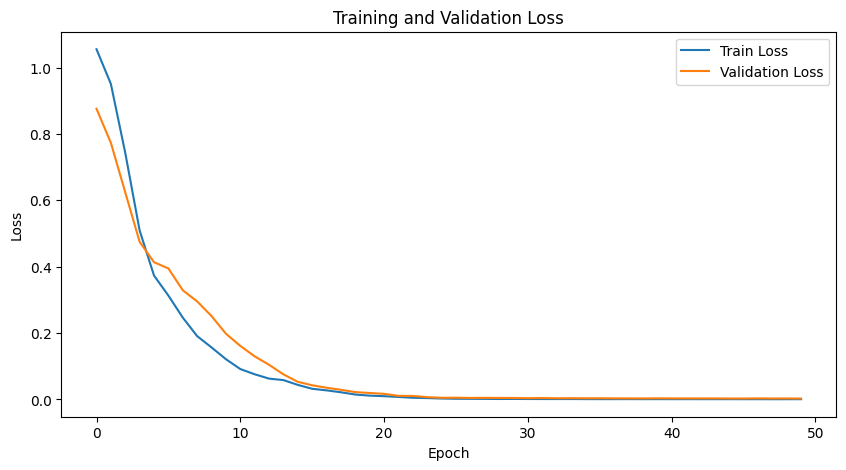

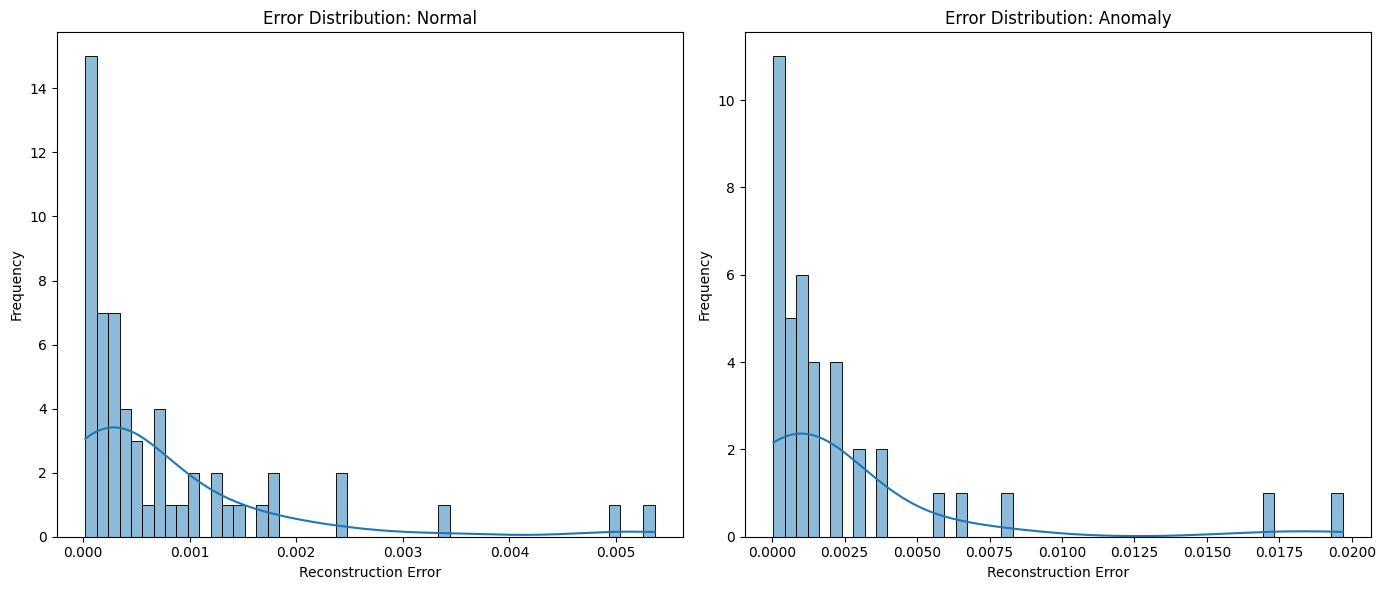

Correct normal predictions: 111/39
Correct anomaly predictions: 45/39
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_divi

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

zoom= dados_intervalo
#zoom= residential_data3

# Pré-processamento dos dados
cargas = zoom[[col for col in zoom.columns if any(key in col for key in ["circulation_pump", "dishwasher", "freezer", "refrigerator", "washing_machine", "heat_pump", "ev"])]].sum(axis=1)
geracao = zoom[[col for col in zoom.columns if "pv" in col]].sum(axis=1)
importacao = zoom["residential3_grid_import"]
exportacao = zoom["residential3_grid_export"]

# Consolidar os dados
features = pd.DataFrame({
    "Cargas Calculadas": dados_intervalo['Cargas Calculadas'],
    "geracao": geracao,
    "importacao": importacao,
    "exportacao": exportacao
})

# Normalização
data_scaler = StandardScaler()
features_normalized = data_scaler.fit_transform(features)

# Divisão dos dados
X_train, X_test = train_test_split(features_normalized, test_size=0.4, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criar DataLoader
dataset_train = TensorDataset(X_train_tensor, X_train_tensor)
dataset_test = TensorDataset(X_test_tensor, X_test_tensor)
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)

# Definição do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Inicializar o modelo, otimizador e função de perda
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Treinamento do modelo
num_epochs = 50
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    for X_batch, _ in dataloader_train:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, X_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_loss.append(epoch_loss / len(dataloader_train))

    # Validação
    model.eval()
    val_epoch_loss = 0
    with torch.no_grad():
        for X_batch, _ in dataloader_test:
            outputs = model(X_batch)
            loss = criterion(outputs, X_batch)
            val_epoch_loss += loss.item()
    val_loss.append(val_epoch_loss / len(dataloader_test))

    # Imprimir a perda de treinamento e validação a cada época
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss[-1]:.4f}, Validation Loss: {val_loss[-1]:.4f}")

# Avaliação do modelo
model.eval()
y_test_pred = model(X_test_tensor).detach().numpy()
mse_test = mean_squared_error(X_test, y_test_pred)
print(f"Test MSE: {mse_test:.4f}")

# Plotar os resultados de loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Visualizar as distribuições dos erros de reconstrução para predições normais e anômalas
def plot_error_distribution(model, dataset, label, ax):
    predictions, pred_losses = predict(model, dataset)
    sns.histplot(pred_losses, bins=50, kde=True, ax=ax)
    ax.set_title(f"Error Distribution: {label}")
    ax.set_xlabel("Reconstruction Error")
    ax.set_ylabel("Frequency")

# Função para calcular os erros de reconstrução
def predict(model, dataset):
    model.eval()
    pred_losses = []
    predictions = []
    with torch.no_grad():
        for X_batch, _ in DataLoader(dataset, batch_size=16):
            outputs = model(X_batch)
            loss = torch.mean((outputs - X_batch) ** 2, axis=1)
            pred_losses.extend(loss.numpy())
            predictions.extend(outputs.numpy())
    return np.array(predictions), np.array(pred_losses)

# Plotar as distribuições de erro para as amostras normais e anômalas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plot_error_distribution(model, dataset_train, "Normal", ax[0])
plot_error_distribution(model, dataset_test, "Anomaly", ax[1])
plt.tight_layout()
plt.show()

# Cálculo das métricas de desempenho (Precision, Recall, Accuracy, F1-Score)
THRESHOLD = 0.1  # Ajuste o threshold conforme necessário

# Para amostras normais (com erro abaixo do limiar)
normal_pred = np.sum(y_test_pred < THRESHOLD)
print(f'Correct normal predictions: {normal_pred}/{len(X_test)}')

# Para amostras anômalas (com erro acima do limiar)
anomaly_pred = np.sum(y_test_pred >= THRESHOLD)
print(f'Correct anomaly predictions: {anomaly_pred}/{len(X_test)}')

# Calcular as métricas
y_test_class = [0 if loss < THRESHOLD else 1 for loss in np.mean((X_test_tensor.numpy() - y_test_pred) ** 2, axis=1)]
y_pred_class = [0 if loss < THRESHOLD else 1 for loss in np.mean((X_test_tensor.numpy() - y_test_pred) ** 2, axis=1)]

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


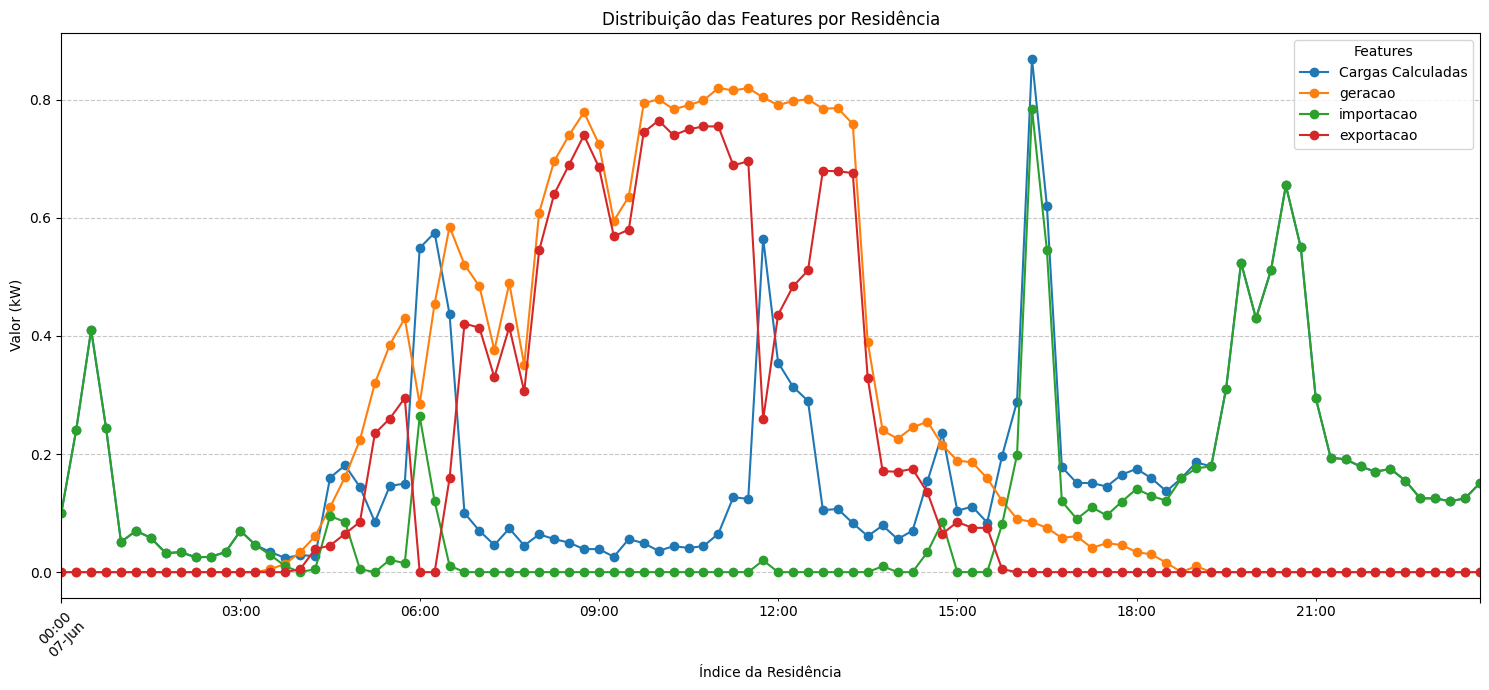

Epoch 1/50, Train Loss: 1.1515, Validation Loss: 1.0104
Epoch 2/50, Train Loss: 1.0524, Validation Loss: 0.9742
Epoch 3/50, Train Loss: 1.0536, Validation Loss: 0.9209
Epoch 4/50, Train Loss: 0.9052, Validation Loss: 0.8220
Epoch 5/50, Train Loss: 0.7218, Validation Loss: 0.6960
Epoch 6/50, Train Loss: 0.5239, Validation Loss: 0.5544
Epoch 7/50, Train Loss: 0.3803, Validation Loss: 0.4198
Epoch 8/50, Train Loss: 0.2727, Validation Loss: 0.2809
Epoch 9/50, Train Loss: 0.1548, Validation Loss: 0.1982
Epoch 10/50, Train Loss: 0.1042, Validation Loss: 0.1602
Epoch 11/50, Train Loss: 0.0888, Validation Loss: 0.1461
Epoch 12/50, Train Loss: 0.0878, Validation Loss: 0.1313
Epoch 13/50, Train Loss: 0.0646, Validation Loss: 0.1288
Epoch 14/50, Train Loss: 0.0608, Validation Loss: 0.1166
Epoch 15/50, Train Loss: 0.0562, Validation Loss: 0.1125
Epoch 16/50, Train Loss: 0.0482, Validation Loss: 0.1035
Epoch 17/50, Train Loss: 0.0463, Validation Loss: 0.0960
Epoch 18/50, Train Loss: 0.0387, Validat

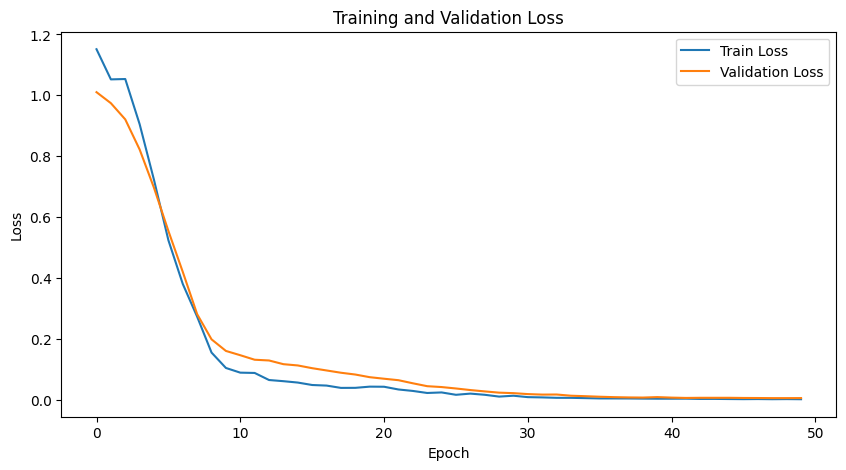

<Figure size 1200x600 with 0 Axes>

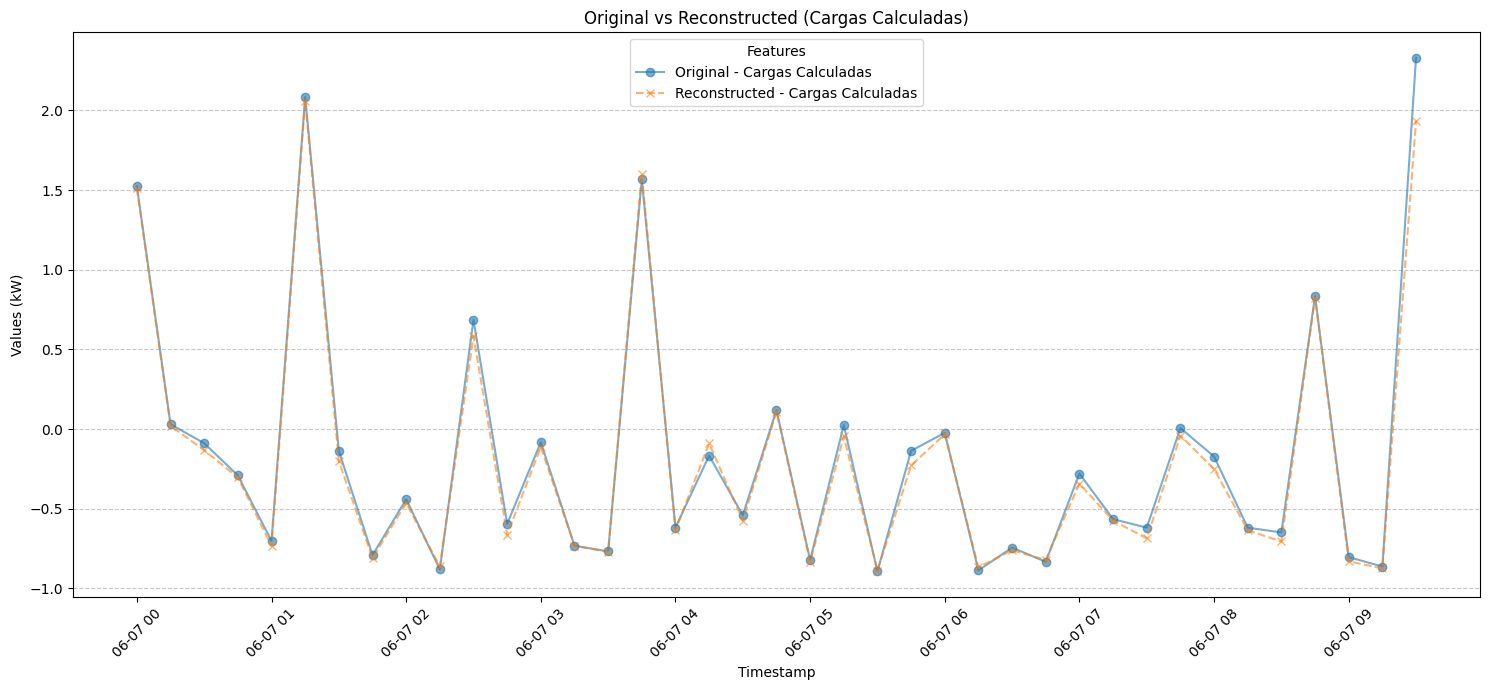

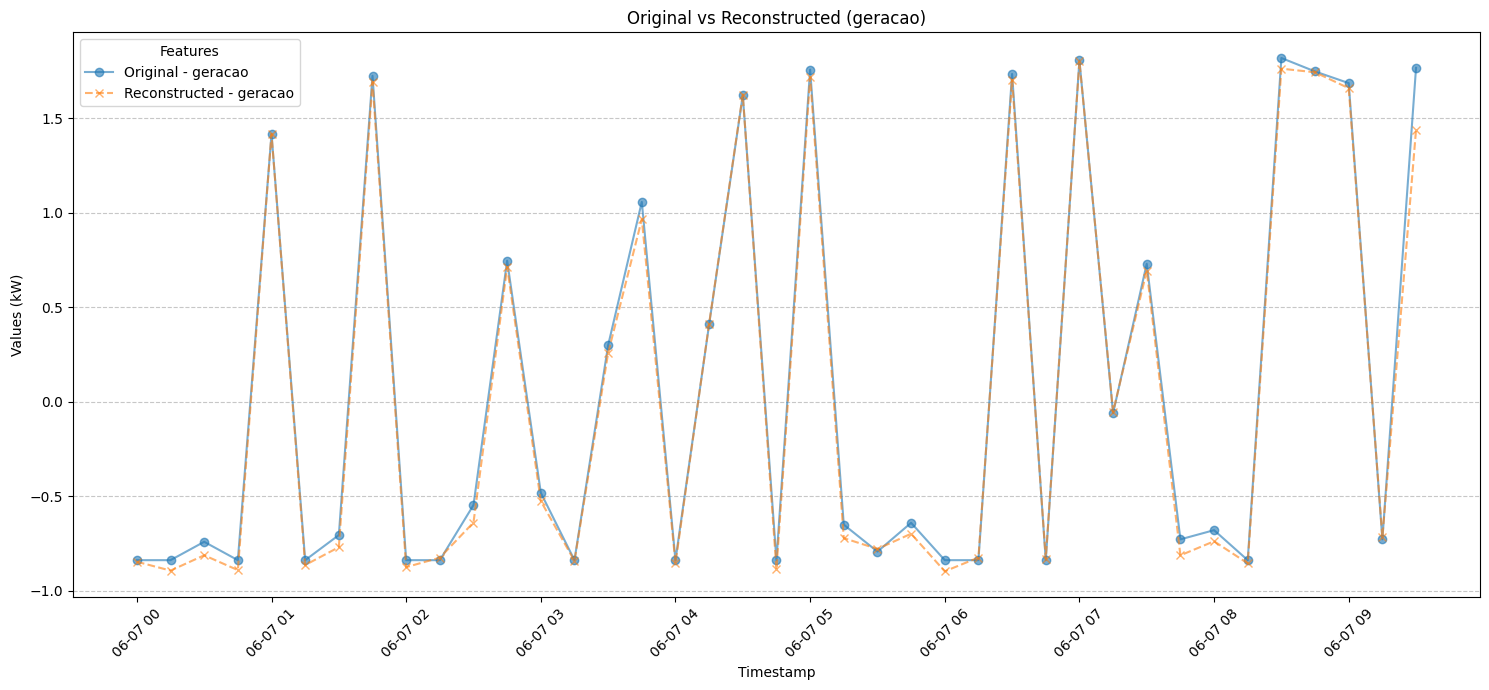

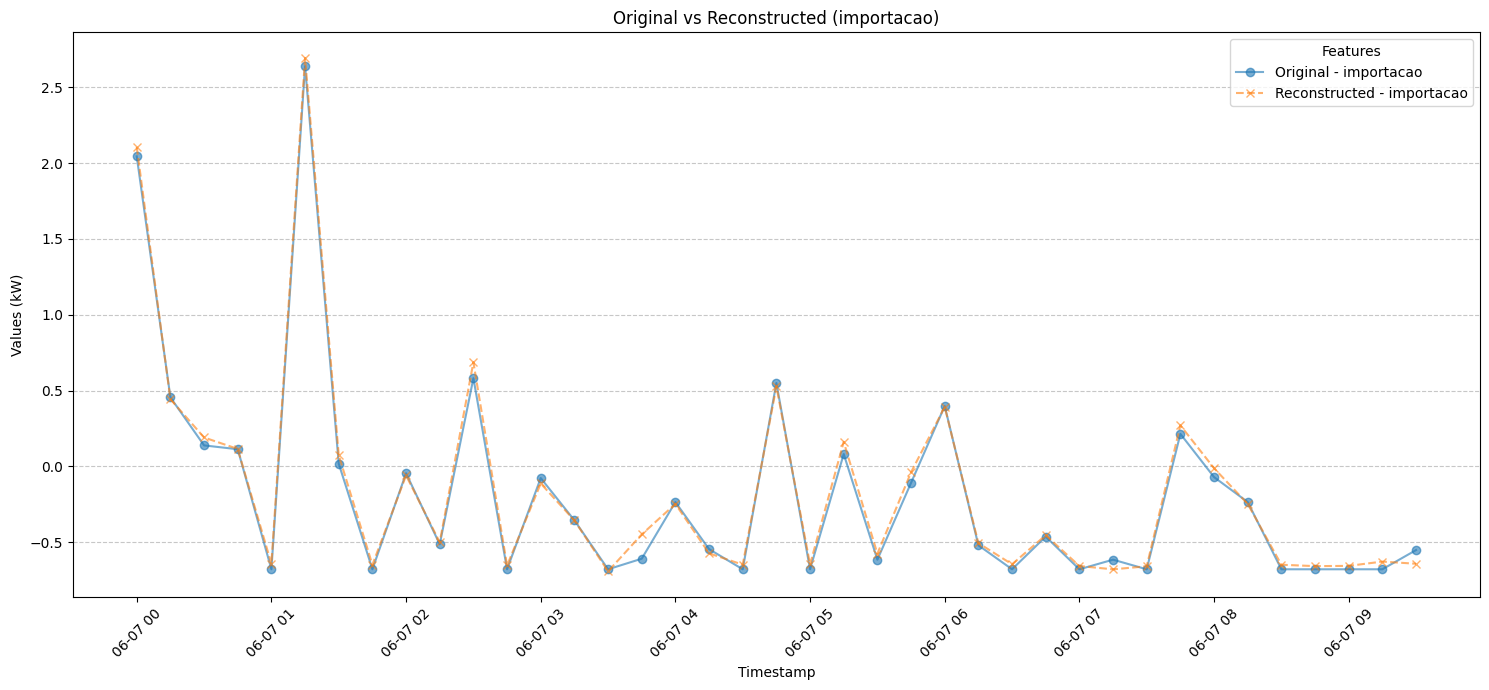

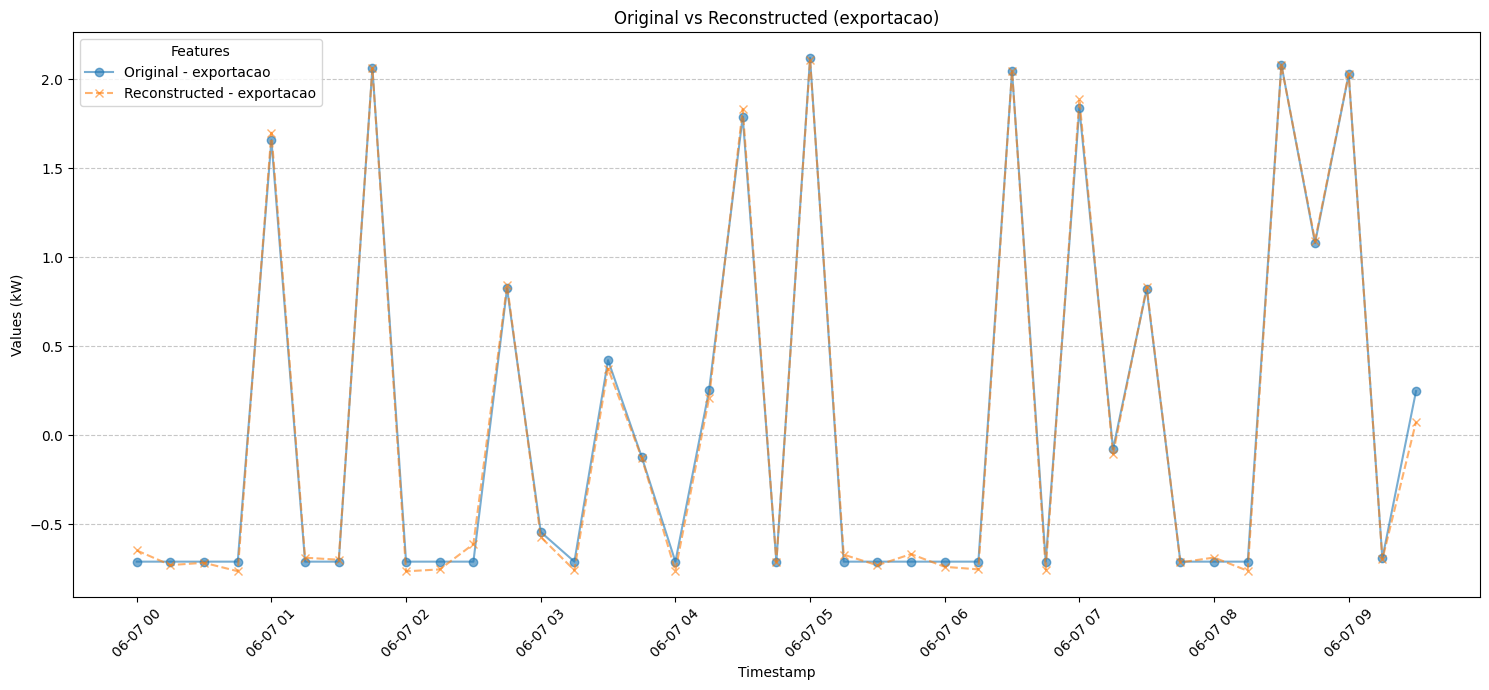

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset


zoom= dados_intervalo
#zoom= residential_data3


# Pré-processamento dos dados
cargas = zoom[[col for col in zoom.columns if any(key in col for key in ["circulation_pump", "dishwasher", "freezer", "refrigerator", "washing_machine", "heat_pump", "ev"])]].sum(axis=1)
geracao = zoom[[col for col in zoom.columns if "pv" in col]].sum(axis=1)
importacao = zoom["residential3_grid_import"]
exportacao = zoom["residential3_grid_export"]

# Consolidar os dados
features = pd.DataFrame({
    "Cargas Calculadas": dados_intervalo['Cargas Calculadas'],
    "geracao": geracao,
    "importacao": importacao,
    "exportacao": exportacao
})

# Supondo que `zoom` tem uma coluna de timestamp
timestamps = zoom.index  # Caso o índice seja o timestamp

# Plot das features
features.plot(kind="line", figsize=(15, 7), marker='o')
plt.title("Distribuição das Features por Residência")
plt.xlabel("Índice da Residência")
plt.ylabel("Valor (kW)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Features")
plt.tight_layout()
plt.show()

# Normalização
data_scaler = StandardScaler()
features_normalized = data_scaler.fit_transform(features)

# Divisão dos dados
X_train, X_test = train_test_split(features_normalized, test_size=0.4, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criar DataLoader
dataset_train = TensorDataset(X_train_tensor, X_train_tensor)
dataset_test = TensorDataset(X_test_tensor, X_test_tensor)
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)

# Definição do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Inicializar o modelo, otimizador e função de perda
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Treinamento do modelo
num_epochs = 50
train_loss = []
val_loss = []  # Lista para armazenar a perda de validação

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    for X_batch, _ in dataloader_train:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, X_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_loss.append(epoch_loss / len(dataloader_train))

    # Validação
    model.eval()
    val_epoch_loss = 0
    with torch.no_grad():
        for X_batch, _ in dataloader_test:
            outputs = model(X_batch)
            loss = criterion(outputs, X_batch)
            val_epoch_loss += loss.item()
    val_loss.append(val_epoch_loss / len(dataloader_test))

    # Imprimir a perda de treinamento e validação a cada época
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss[-1]:.4f}, Validation Loss: {val_loss[-1]:.4f}")

# Avaliação do modelo
model.eval()
y_test_pred = model(X_test_tensor).detach().numpy()
mse_test = mean_squared_error(X_test, y_test_pred)
print(f"Test MSE: {mse_test:.4f}")

# Plotar os resultados de loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Visualizar reconstruções
plt.figure(figsize=(12, 6))

# Lista de nomes das features
feature_names = features.columns.tolist()

# Número total de features
num_features = X_test.shape[1]

# Loop sobre todas as features para visualização com timestamp
for feature_index in range(num_features):
    plt.figure(figsize=(15, 7))  # Ajustar o tamanho para combinar com o gráfico original
    
    # Usando o índice temporal para o eixo X
    plt.plot(timestamps[:len(X_test)], X_test[:, feature_index], label=f"Original - {feature_names[feature_index]}", marker='o', linestyle='-', alpha=0.6)
    plt.plot(timestamps[:len(y_test_pred)], y_test_pred[:, feature_index], label=f"Reconstructed - {feature_names[feature_index]}", marker='x', linestyle='--', alpha=0.6)
    
    plt.xlabel("Timestamp")
    plt.ylabel("Values (kW)")
    plt.title(f"Original vs Reconstructed ({feature_names[feature_index]})")
    plt.legend(title="Features")
    plt.xticks(rotation=45)  # Para ajustar a rotação do timestamp
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Similar à configuração do gráfico das features
    plt.tight_layout()
    plt.show()
    


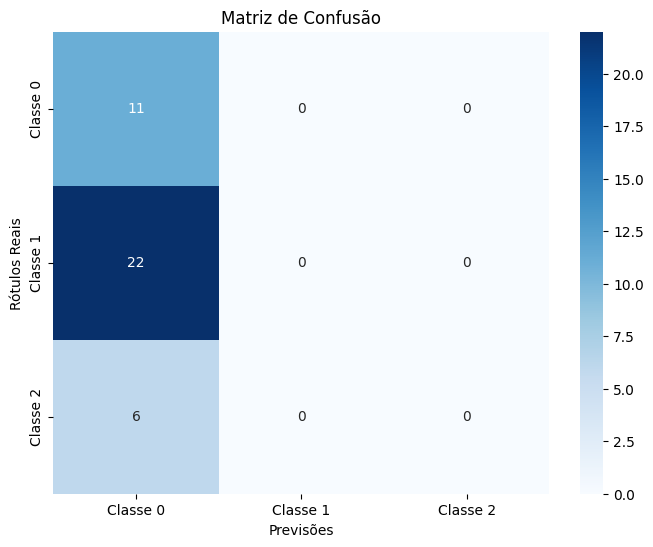

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular o erro de reconstrução para cada amostra
reconstruction_errors = np.mean((X_test_tensor.numpy() - y_test_pred) ** 2, axis=1)

# 2. Definir limites para as classes com base no erro de reconstrução
thresholds = [0.1, 0.3]  # Defina os limites conforme necessário
y_pred_class = np.digitize(reconstruction_errors, bins=thresholds)

# 3. Definir as classes reais (y_test) com base nas características de consumo
# Exemplo: Baseado em alguma lógica de threshold ou segmentação
y_test_class = []
for i in range(len(X_test)):
    if X_test[i, 0] < 0.2 and X_test[i, 3] > 0.3:  # Exemplo de lógica para definir as classes
        y_test_class.append(0)
    elif X_test[i, 0] < 0.5:  # Outro exemplo de lógica para as classes
        y_test_class.append(1)
    else:
        y_test_class.append(2)

# 4. Calcular a matriz de confusão
cm = confusion_matrix(y_test_class, y_pred_class)

# 5. Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1", "Classe 2"], yticklabels=["Classe 0", "Classe 1", "Classe 2"])
plt.xlabel("Previsões")
plt.ylabel("Rótulos Reais")
plt.title("Matriz de Confusão")
plt.show()


In [94]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação, que inclui precisão, recall, acurácia e F1-score
report = classification_report(y_test_class, y_pred_class, target_names=["Classe 0", "Classe 1", "Classe 2"])
print(report)


              precision    recall  f1-score   support

    Classe 0       0.28      1.00      0.44        11
    Classe 1       0.00      0.00      0.00        22
    Classe 2       0.00      0.00      0.00         6

    accuracy                           0.28        39
   macro avg       0.09      0.33      0.15        39
weighted avg       0.08      0.28      0.12        39



d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1_UFMA\mestrado\2 segundo semestre\cidades_inteligentes\TRABALHO\Grid_energy\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte